## Experiments template for different types of networks, 1 sample from each type of network, multiple runs per sample

In [2]:
import os


dir = "networks"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

### Generate networks

First fixed Powerlaw networks with m = 1, and p = 0.1.\
Variable number of nodes.

In [2]:
dir = "networks/powerlaw_m=1_p=0.1"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

In [3]:
import numpy as np


MIN_NODES = 10
MAX_NODES = 100

num_nodes = np.linspace(MIN_NODES, MAX_NODES, MAX_NODES//MIN_NODES)
num_nodes

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [4]:
import numpy as np
import networkx as nx


try:
    Graphs = np.load(f"{dir}/graphs.npy", allow_pickle=True)
except:
    Graphs = np.empty(shape=(len(num_nodes),), dtype=object)
    for i, n in enumerate(num_nodes):
        Graphs[i] = nx.powerlaw_cluster_graph(n=n, m=1, p=0.1)
    np.save(f"{dir}/graphs.npy", Graphs)

#### Hierarchical approach with Gurobi first

In [5]:
# output folder
dir =dir+"/output"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

In [6]:
solver = "gurobi"
make_dir(f"{dir}/{solver}")

In [7]:
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.searchers.hierarchical_community_searcher.hierarchical_community_searcher import HierarchicalCommunitySearcher

In [8]:
from tqdm import tqdm


N_RUNS = 100


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):    
    for r in range(N_RUNS):
        # new instance of the sampler each time
        gurobi = GurobiSampler(G, supress_output=True)
        hierch_searcher = HierarchicalCommunitySearcher(gurobi)
        comms_res = hierch_searcher.hierarchical_community_search()
        
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

0it [00:00, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-27


10it [06:53, 41.30s/it]


### Now Leiden

In [11]:
solver = "leiden"
make_dir(f"{dir}/{solver}")

In [12]:
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.searchers.community_searcher.community_searcher import CommunitySearcher

In [13]:
from tqdm import tqdm


N_RUNS = 100


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):
    leiden = LeidenSampler(G)
    searcher = CommunitySearcher(leiden)
    
    for r in range(N_RUNS):
        comms_res = searcher.community_search()
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

10it [00:00, 21.06it/s]


#### Louvain

In [6]:
solver = "louvain"
make_dir(f"{dir}/{solver}")

In [7]:
from Qommunity.samplers.regular.louvain_sampler import LouvainSampler
from Qommunity.searchers.community_searcher import CommunitySearcher

In [8]:
from tqdm import tqdm


N_RUNS = 100


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):
    louvain = LouvainSampler(G)
    searcher = CommunitySearcher(louvain)
    
    for r in range(N_RUNS):
        comms_res = searcher.community_search()
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

10it [00:01,  5.36it/s]


### Let's plot the modularity results

In [10]:
mods_gurobi = np.load(f"{dir}/gurobi/gurobi-mods_final.npy")
mods_leiden = np.load(f"{dir}/leiden/leiden-mods_final.npy")
mods_louvain = np.load(f"{dir}/louvain/louvain-mods_final.npy")

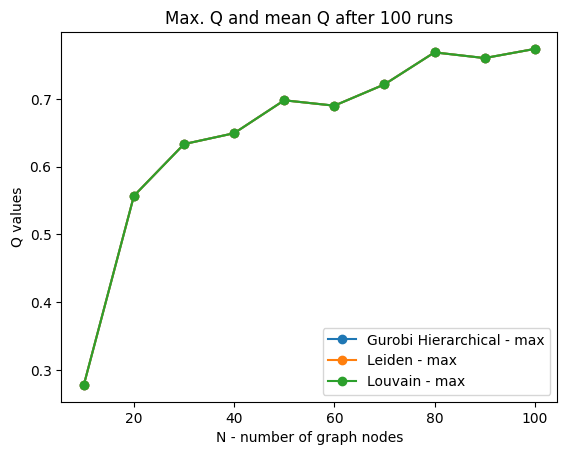

In [17]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1)
plt.plot(num_nodes, mods_gurobi.max(axis=-1), '-o', label="Gurobi Hierarchical - max")
plt.plot(num_nodes, mods_leiden.max(axis=-1), '-o', label="Leiden - max")
plt.plot(num_nodes, mods_louvain.max(axis=-1), '-o', label="Louvain - max")
plt.legend()
ax.set_title(f"Max. Q and mean Q after {N_RUNS} runs");
ax.set_xlabel("N - number of graph nodes");
ax.set_ylabel("Q values");